1. INTRODUCTION And Data Introduce



The dataset titled[ Electric Vehicle Data - Washington State Department ](https://www.kaggle.com/datasets/sahityasetu/electric-vehicle-data-washington-state-department/data)provides a comprehensive overview of electric vehicles (EVs) registered in Washington State. Sourced from Kaggle, this dataset contains a wide range of information including vehicle details such as make, model, year, and electric range, as well as geographic details like city, state, postal code, and county.

Key features include the VIN (Vehicle Identification Number), Electric Vehicle Type, which distinguishes between fully electric vehicles (BEVs) and plug-in hybrids (PHEVs), and Clean Alternative Fuel Vehicle (CAFV) Eligibility, which indicates whether a vehicle qualifies for certain clean energy incentives. Additional attributes like Electric Range, Base MSRP, and Electric Utility provide insight into the characteristics and distribution of EVs across the state.

This data can be used for various analyses, such as determining the adoption rate of EVs by region, assessing the impact of clean fuel programs, and identifying geographic trends in electric vehicle registrations. By analyzing these features, we can explore the role of electric vehicles in the transition to cleaner energy and transportation systems.









Project Introduction And Sloving

This project focuses on analyzing electric vehicle data from Washington State to predict whether a vehicle qualifies for Clean Alternative Fuel Vehicle (CAFV) incentives. The primary goal is to build a machine learning model that can classify vehicles based on their eligibility for these incentives, which is determined by various factors such as electric range, model year, and vehicle type.

Problem to Solve:
The problem is to develop a classification model that predicts whether a vehicle is eligible for CAFV incentives. By analyzing vehicle data, we aim to understand the factors that influence eligibility and to accurately predict the eligibility status for each vehicle.

This dataset basicaly talks about how we can see the data on ev's and see how they are realiable. Also takes in to account there fuel type or there model year. The quesitons I answered if there provide a alreative to fuel or not. Aslo should we swich to them , bhev or just ev. Which is what I hoped to do. Also sloving a Classification problem - In my project, you're working on a binary classification problem. The goal is to predict whether a vehicle is Clean Alternative Fuel Vehicle (CAFV) Eligible or not

# Ev Trends in Washington, Usa

The EV market in Washington has been growing steadily, driven by environmental concerns, government incentives, and advancements in technology. This report will delve into various aspects of EVs, including:

Reliability of EVs: Analyzing maintenance records and user feedback to assess how reliable EVs are compared to their traditional counterparts.

Fuel Types: Comparing different fuel types available in the EV market, including BEVs and hybrid models, to understand their advantages and limitations.

Model Year Analysis: Examining how newer models are outperforming older ones in terms of efficiency, technology, and user satisfaction.

Recommendations: Based on the analysis, we will provide insights on whether to switch to EVs or BEVs.

2. Importing the data the liberies

Before diving into the analysis, we need to import the necessary libraries and load the dataset. This will allow us to explore the data and uncover trends related to EV adoption in Washington

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


Step 2: Clean the Data
 Data cleaning is a crucial step in ensuring the accuracy and reliability of our analysis. In this section, we will identify and address any issues within the dataset, such as missing values, duplicates, and inconsistencies. Here’s how we’ll approach the data cleaning process:

Step 1: Inspecting the Dataset
First, we’ll check the dataset for missing values and overall structure.

Step 2: Handling Missing Values
We need to determine how to handle any missing values found in the dataset. Options include:

Dropping rows: If the missing values are minimal and do not significantly impact the analysis.
Filling missing values: Using mean, median, or mode for numerical data, or a placeholder for categorical data.


Step 3: Removing Duplicates
We need to ensure there are no duplicate entries that could skew our analysis.

In [ ]:
# df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Eligibility unknown as battery range has not been researched"]


df = df.drop(df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Eligibility unknown as battery range has not been researched"].index)
# good alternative = 1
# bad alternative = 0

The purpose of this line is to quickly assess the different categories of CAFV eligibility in your dataset, allowing you to understand the distribution and classification of vehicles under the CAFV program.

In [ ]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Not eligible due to low battery range',
       'Clean Alternative Fuel Vehicle Eligible'], dtype=object)

In [ ]:
from ctypes import string_at
missing_values = df.isnull().sum()

df = df.dropna()

duplicates = df.duplicated().sum()

duplicates = df.duplicated().sum()

df['Electric Range'] = df['Electric Range'].astype(int)
df['Model Year'] = df['Model Year'].astype(int)

df.head()



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


Step 3: Convert Categorical Data to Numerical. This step is basicaly converting the data from rows to numerical rows. I used chat to help me outout this information

This report outlines the preprocessing steps taken to prepare the dataset for machine learning. The features were separated from the target variable, which indicates Clean Alternative Fuel Vehicle eligibility, and encoded into numerical values. Categorical features in the dataset were transformed using Label Encoding to facilitate model training. The target variable was mapped to binary values: 1 for eligible vehicles and 0 for ineligible ones. Finally, the shapes of the feature set (X) and target variable (y) were printed to ensure they align correctly for modeling. These preprocessing steps are crucial for effective machine learning implementation.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Features (X) and target (y)
X = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map({
    'Clean Alternative Fuel Vehicle Eligible': 1,
    'Not eligible due to low battery range': 0
})


# # Encode the target (y)
# le_target = LabelEncoder()
# y = le_target.fit_transform(y)

# # Encode categorical features in X
for column in X.columns:
    if X[column].dtype == 'object':  # If the column is categorical
        le_feature = LabelEncoder()
        X[column] = le_feature.fit_transform(X[column])

print("X shape:", X.shape)
print("y shape:", y.shape)




X shape: (89356, 16)
y shape: (89356,)


Step 4: Split the Data into Features and Target
This will spilt the data apart into two portions

This report summarizes the steps taken to split the dataset and train a Random Forest Classifier.

Data Splitting: The dataset was divided into training and testing sets using an 80-20 split, ensuring that the model could be trained on one portion while being evaluated on another. The shapes of the resulting datasets were printed for verification.

Handling Missing Values: A SimpleImputer was employed to address any missing values in the training set by using the mean strategy. This ensures that the model receives complete data for training.

Model Training: A Random Forest Classifier with 100 estimators was instantiated and trained on the imputed training set. This ensemble method is known for its robustness and effectiveness in classification tasks.

Imputation for Testing Set: The same imputer was applied to the testing set to ensure consistency in handling missing values.

Predictions: The trained model was then used to make predictions on the testing set.

Model Evaluation: The accuracy of the model was assessed using the accuracy_score metric, providing a clear indication of its performance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Train a Random Forest Classifier
imputer = SimpleImputer(strategy='mean') # Create the imputer instance
X_train = imputer.fit_transform(X_train) # Impute missing values in X_train
random_forest_mode = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_mode.fit(X_train, y_train)

# Impute missing values in X_test using the same imputer
X_test = imputer.transform(X_test) # Use transform, not fit_transform, to apply the same imputation

# Make predictions
y_pred = random_forest_mode.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

X_train shape: (71484, 16)
X_test shape: (17872, 16)
y_train shape: (71484,)
y_test shape: (17872,)
Accuracy: 1.0


Step 6: Evaluate the Model

This report details the evaluation of the Random Forest Classifier model and visualizes feature importance.

Model Evaluation: The model’s performance was assessed using the classification_report, which provides key metrics such as precision, recall, F1-score, and support for each class in the target variable. This comprehensive report helps to understand the model's strengths and weaknesses in predicting Clean Alternative Fuel Vehicle eligibility.

Feature Importance: The importance of each feature used in the model was extracted from the trained Random Forest Classifier. This allows for insights into which features have the most significant impact on the model’s predictions.

Visualization: A bar chart was generated to display the feature importances, ordered from most to least important. This visualization aids in interpreting the model and understanding the factors influencing its decisions.

Insights: By analyzing the classification report and feature importances, stakeholders can make informed decisions regarding which features to focus on for improving model accuracy and understanding the underlying data relationships.

Next Steps: Based on the evaluation, further model tuning and feature engineering may be necessary to enhance performance.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4088
           1       1.00      1.00      1.00     13784

    accuracy                           1.00     17872
   macro avg       1.00      1.00      1.00     17872
weighted avg       1.00      1.00      1.00     17872



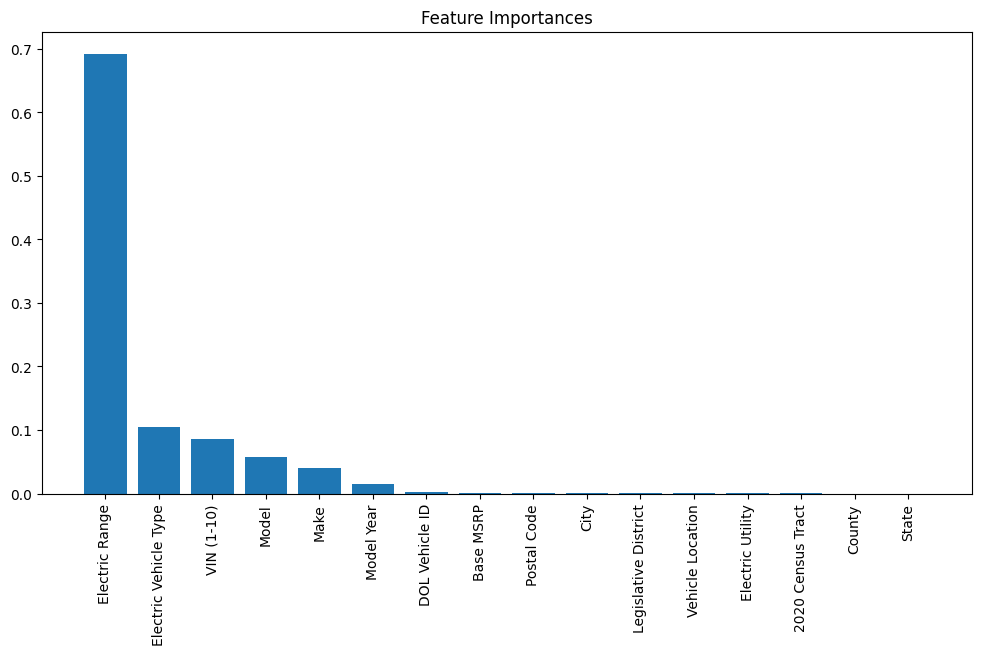

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

# You can also visualize the feature importance
importances = random_forest_mode.feature_importances_ # Changed clf to random_forest_mode
import numpy as np # Import the NumPy library and assign it to the alias 'np'
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

Step 7. Story

In this classification project, the goal was to predict the eligibility of electric vehicles for Clean Alternative Fuel Vehicle (CAFV) status based on various vehicle attributes. The dataset used for this task included a variety of features, such as vehicle make, model, electric utility, and electric range, among others. The target variable was the CAFV eligibility, which indicated whether a vehicle was eligible for CAFV incentives based on its battery range and fuel type. Conclusion: Through this project, a classification problem was defined and solved by carefully processing the data and applying machine learning techniques. The final model will allow us to predict whether a given electric vehicle is eligible for CAFV benefits, which can be valuable for understanding trends in electric vehicle adoption and aiding in policy-making related to clean energy incentives.

This project emphasizes the importance of proper data cleaning, feature encoding, and the application of machine learning algorithms to derive meaningful insights from real-world data. The key insight here is that attributes like electric range and vehicle type are strong predictors of CAFV eligibility, which aligns with the core requirements of clean alternative fuel vehicle programs.






